In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

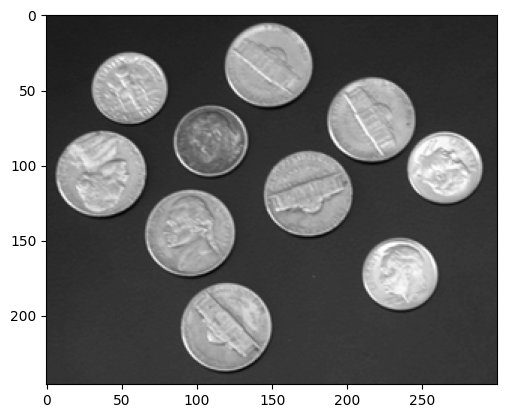

In [4]:
im_path = 'coins.png'
im_bgr  = cv2.imread(im_path)
im_gray  = cv2.imread(im_path, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap ="gray")

126.0


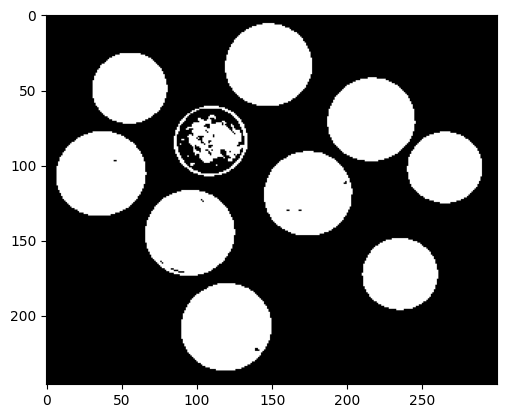

In [7]:
# 1. otsu binarization 
###############################################
# binarization
thres, im_bin = cv2.threshold(im_gray, thresh = 0 , maxval = 255, type = cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#thres, im_bin = cv2.threshold(im_gray, thresh = 100 , maxval = 255, type = cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
print(thres) # 126
plt.imshow(im_bin, cmap = "gray")

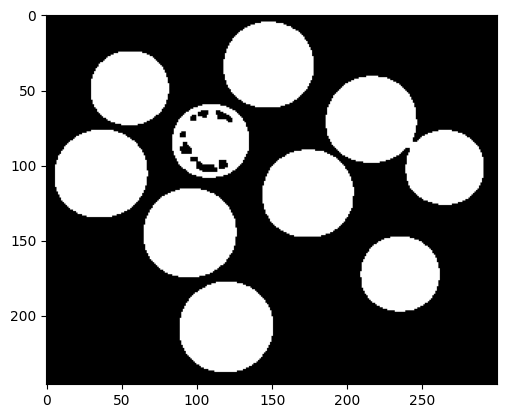

In [8]:
#
# Morphological Filter 
kernel = np.ones((3,3),np.uint8)
# or using API
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

im_dilation = cv2.dilate(im_bin,kernel,iterations = 1)
kernel = np.ones((3,3),np.uint8)
im_closing = cv2.morphologyEx(im_dilation, cv2.MORPH_CLOSE, kernel)
plt.imshow(im_closing, cmap = "gray")

label 수: 9


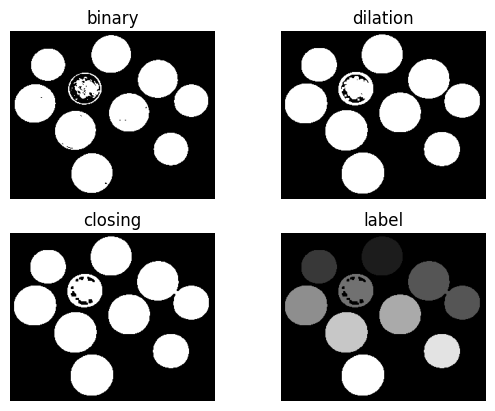

In [9]:

################################################
# 연결 영역 검출 
##############################################
ret, im_labels = cv2.connectedComponents(im_closing)  # ret 는 레이블(연결된 영역수)
print('label 수:', ret - 1)  # 0은 백그라운드라서 제외 함
scaling = 255//ret          # 차이가 잘보이기 위하여 

plt.subplot(2,2,1), plt.imshow(im_bin, cmap='gray'), plt.title('binary'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(im_dilation, cmap='gray'), plt.title('dilation'), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(im_closing, cmap='gray'), plt.title('closing'), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(im_labels*scaling, cmap='gray'), plt.title('label'), plt.axis('off')
plt.show() 

contours dim: 16
contours[0]: [[[113 178]]

 [[112 179]]

 [[110 179]]

 [[109 180]]

 [[107 180]]

 [[105 182]]

 [[104 182]]

 [[103 183]]

 [[102 183]]

 [[100 185]]

 [[ 99 185]]

 [[ 95 189]]

 [[ 95 190]]

 [[ 93 192]]

 [[ 93 193]]

 [[ 92 194]]

 [[ 92 195]]

 [[ 91 196]]

 [[ 91 197]]

 [[ 90 198]]

 [[ 90 201]]

 [[ 89 202]]

 [[ 89 216]]

 [[ 90 217]]

 [[ 90 219]]

 [[ 91 220]]

 [[ 91 221]]

 [[ 92 222]]

 [[ 92 223]]

 [[ 93 224]]

 [[ 93 225]]

 [[100 232]]

 [[101 232]]

 [[103 234]]

 [[104 234]]

 [[105 235]]

 [[107 235]]

 [[108 236]]

 [[111 236]]

 [[112 237]]

 [[126 237]]

 [[127 236]]

 [[130 236]]

 [[131 235]]

 [[132 235]]

 [[133 234]]

 [[134 234]]

 [[135 233]]

 [[136 233]]

 [[138 231]]

 [[139 231]]

 [[143 227]]

 [[143 226]]

 [[146 223]]

 [[146 222]]

 [[147 221]]

 [[147 220]]

 [[148 219]]

 [[148 218]]

 [[149 217]]

 [[149 214]]

 [[150 213]]

 [[150 201]]

 [[149 200]]

 [[149 197]]

 [[148 196]]

 [[148 195]]

 [[147 194]]

 [[147 193]]

 [[1

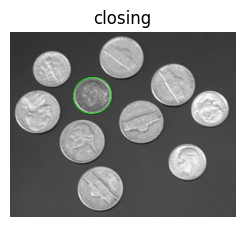

In [13]:
# contours 
######################################################
#im2, contours, hierarchy = cv2.findContours(im_closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#plt.subplot(1,2,1), plt.imshow(im_labels, cmap='gray'), plt.title('label'), plt.axis('off')
contours, hierarchy = cv2.findContours(im_closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
im_bgr  = cv2.imread(im_path)

#np_contours = np.array(contours)
#print(np_contours.dtype) # object, so not very usefull for multi-D cases
print("contours dim:", len(contours))
print("contours[0]:", contours[0])
print("contours[0]:", contours[0].shape)
print("hierarchy:", hierarchy)
cv2.drawContours(im_bgr, contours, 5, (0,255,0), 1)
plt.subplot(1,2,2), plt.imshow(im_bgr[:,:,::-1]), plt.title('closing'), plt.axis('off')
plt.show() 
